In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv', 
                    encoding='ISO-8859-1', sep=';', 
                    skiprows=3, skipfooter=12,
                    thousands='.', decimal=',',
                    engine='python')
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,3.050109e+08
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4.437116e+09


In [4]:
pd.options.display.float_format = '{:.2f}'.format

## **Desafio 01:** Escolher um título mais descritivo

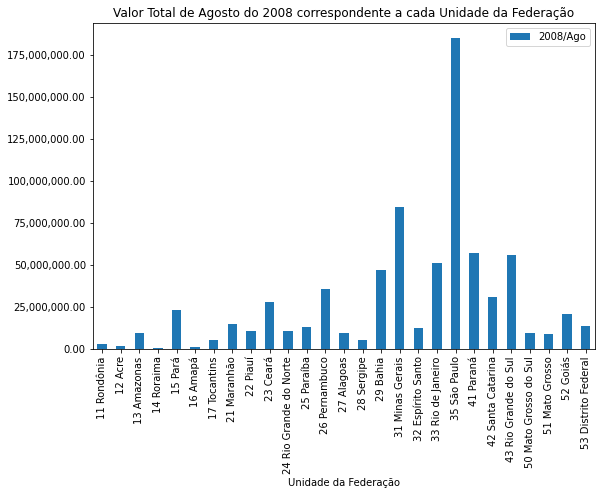

In [10]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor Total de Agosto do 2008 correspondente a cada Unidade da Federação")
plt.show()

## **Desafio 02:** Faça a mesma análise realizada em aula, porém para o mês mais recente.

In [11]:
mes_recente = dados.columns[-2]

ax = dados.plot(x="Unidade da Federação", y=mes_recente, kind='bar', figsize=(9,6))

TypeError: no numeric data to plot

Como pode se observar que Unidade de Federação como o **Acre** presentam, o caracter **"-"**, o qual não é um valor numérico para ser processado pelo plot.
**Solução:** Podemos reemplazar esses valores ao momento da leitura dos dados, pasando o parâmetro **na_values='-'**.

In [12]:
dados[['Unidade da Federação',mes_recente]].head()

,Unidade da Federação,2020/Ago
0,11 Rondônia,10285455.78
1,12 Acre,-
2,13 Amazonas,14726443.67
3,14 Roraima,2826486.18
4,15 Pará,39911193.02


In [13]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv', 
                    encoding='ISO-8859-1', sep=';', 
                    skiprows=3, skipfooter=12,
                    thousands='.', decimal=',',
                    na_values='-',
                    engine='python')

In [14]:
dados[['Unidade da Federação',mes_recente]].head()

,Unidade da Federação,2020/Ago
0,11 Rondônia,10285455.78
1,12 Acre,nan
2,13 Amazonas,14726443.67
3,14 Roraima,2826486.18
4,15 Pará,39911193.02


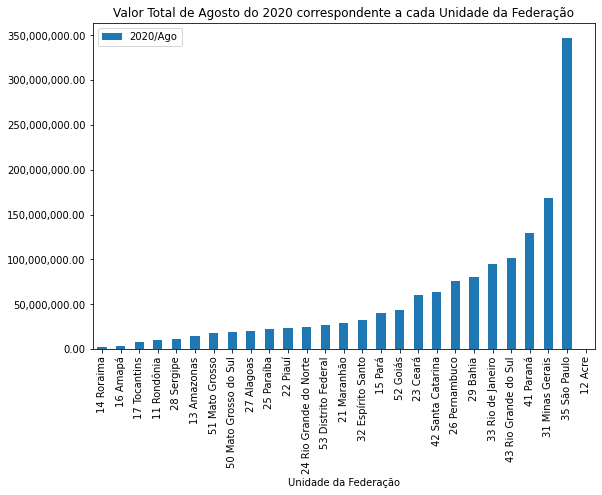

In [17]:
dados_ordenados = dados.sort_values(mes_recente)
ax = dados_ordenados.plot(x="Unidade da Federação", y=mes_recente, kind='bar', figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor Total de Agosto do 2020 correspondente a cada Unidade da Federação")
plt.show()